In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "hrisavbhowmick" # username from the json file
os.environ['KAGGLE_KEY'] = "863b9f3988aacb9da6a4c9e6955b83d1" # key from the json file
!kaggle datasets download -d ntnu-testimon/paysim1 # api copied from kaggle

 92% 163M/178M [00:02<00:00, 51.1MB/s]
100% 178M/178M [00:03<00:00, 60.7MB/s]


In [4]:
ls

paysim1.zip  sample_data/


In [5]:
!unzip "/content/paysim1.zip" -d "/content/paysim1"

Archive:  /content/paysim1.zip
  inflating: /content/paysim1/PS_20174392719_1491204439457_log.csv  


**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance of recipient before the transaction.

**newbalanceDest** - new balance of recipient after the transaction.

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('/content/paysim1/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Understanding Steps

In [56]:
df['step'].value_counts().head(5)

19     51352
18     49579
187    49083
235    47491
307    46968
Name: step, dtype: int64

In [25]:
df['day'] = pd.cut(df['step'],[0,24,48,72,96,120,144,168,192,216,240,264,288,312,336,360,384,408,432,456,480,504,528,552,576,600,624,648,672,696,720,800], 
                   labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])

In [58]:
df.sample(n=5) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day
5918454,404,PAYMENT,40.16,C1150996711,0.00,0.00,M1852864665,0.00,0.0,0,0,17
5169140,358,PAYMENT,4779.81,C146588623,0.00,0.00,M1641131938,0.00,0.0,0,0,15
3349472,253,CASH_IN,228002.82,C1474677649,197196.66,425199.48,C911452600,1902184.82,1674182.0,0,0,11
3611927,273,PAYMENT,3290.33,C604963255,50434.00,47143.67,M1447059811,0.00,0.0,0,0,12
1289981,135,PAYMENT,10506.93,C1907722546,0.00,0.00,M1209158995,0.00,0.0,0,0,6


In [38]:
df_fraud = df[df['isFraud']==1]
df_fraud.shape

(8213, 12)

In [39]:
df_nonfraud = df[df['isFraud']==0]
df_nonfraud.shape

(6354407, 12)

In [41]:
df.groupby(['day']).agg({'day':'count','amount':'sum'}).sort_values(by=['amount'],ascending=False).head(5)

,day,amount
day,,
13,428583,1.386731e+11
14,397876,1.000374e+11
1,574255,9.213187e+10
15,401282,7.747236e+10
17,425766,7.425013e+10


Highest total amount transaction happened on 13th day (for Fraud and Non Fraud combined).

In [64]:
day_amount=df_fraud.groupby(['day']).agg({'day':'count','amount':'sum'})
day_amount.head()

,day,amount
day,,
1,271,2.111638e+08
2,309,3.792397e+08
3,310,3.945089e+08
4,262,4.382468e+08
5,252,2.449806e+08


In [71]:
day_amount = day_amount.rename(columns={'day':'Total_Count'})
day_amount

,Total_Count,amount
day,,
1,271,2.111638e+08
2,309,3.792397e+08
3,310,3.945089e+08
4,262,4.382468e+08
5,252,2.449806e+08
6,228,3.672336e+08
7,272,4.017901e+08
8,278,3.519940e+08
9,255,3.845713e+08


In [73]:
day_amount = day_amount.reset_index()
day_amount.head()

,day,Total_Count,amount
0,1,271,2.111638e+08
1,2,309,3.792397e+08
2,3,310,3.945089e+08
3,4,262,4.382468e+08
4,5,252,2.449806e+08


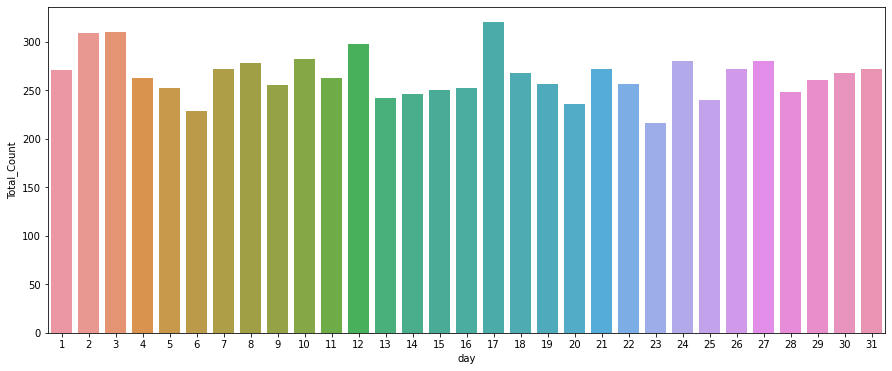

In [76]:
plt.figure(figsize=(15,6))
sns.barplot(x="day", y="Total_Count", data=day_amount)

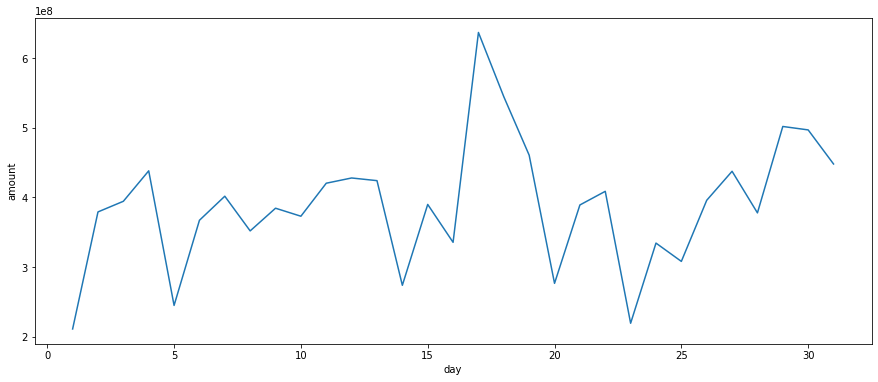

In [78]:
plt.figure(figsize=(15,6))
sns.lineplot(x="day", y="amount", data=day_amount)

Maximum fraud transaction happened on 17th day.

## Understanding 'isFlaggedFraud'

In [79]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [80]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [81]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,9
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,11
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,12
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,17
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,18
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,18
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,24
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,25
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,26
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,27


In [82]:
pd.crosstab(df['isFraud'], df['isFlaggedFraud'])

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In the current scenario, among 8213 fraud transactions model detects only 16 (all of 'TRANSFER' type). Altough non-fraud transactions are flagged correctly by the model, but it has failed to flag most of the fraudulent transactions.

## Understanding 'isFraud'

Text(0.5, 1.0, 'Transactions Fraud vs NonFraud')

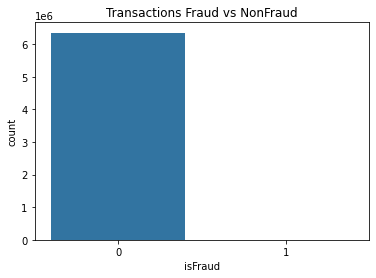

In [83]:
sns.countplot(df['isFraud'])
plt.title('Transactions Fraud vs NonFraud')

In [84]:
df['isFraud'].value_counts(normalize=True)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

Clearly shows we have an imbalanced target. Majority of the transactions are non fraud.

## Understanding 'Type'

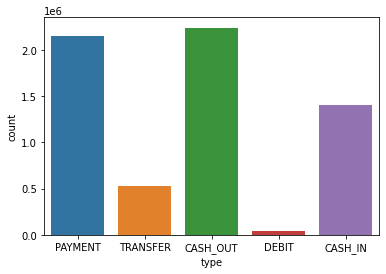

In [85]:
sns.countplot(df['type'])

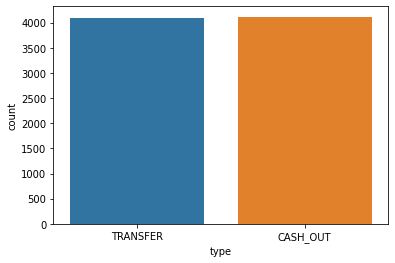

In [86]:
sns.countplot(df_fraud['type'])

Fraud only occurs in 'TRANSFER' or 'CASH_OUT' mode.

## Understanding Amount

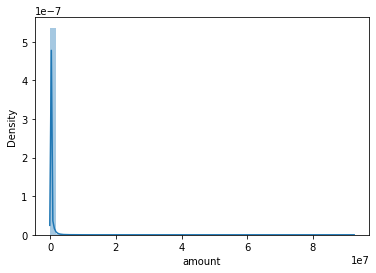

In [90]:
sns.distplot(df['amount'])

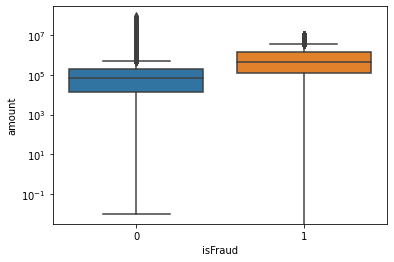

In [92]:
box = sns.boxplot(df['isFraud'], df['amount'])
box.set_yscale('log')

## Understanding Balance Original

In [99]:
df.loc[df['type']=='CASH_IN','trueNewBalanceOrg'] = df.loc[df['type']=='CASH_IN','oldbalanceOrg'] + df.loc[df['type']=='CASH_IN','amount']

In [100]:
df.loc[df['type']!='CASH_IN','trueNewBalanceOrg'] = df.loc[df['type']!='CASH_IN','oldbalanceOrg'] - df.loc[df['type']!='CASH_IN','amount']

In [102]:
df['orgBal_diff'] = df['trueNewBalanceOrg'] != df['newbalanceOrig']
df.sample(n=5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,trueNewBalanceOrg,orgBal_diff
2018287,180,CASH_OUT,262686.08,C1936188694,70042.0,0.0,C1249610017,2331890.07,2594576.15,0,0,8,-192644.08,True
3770626,280,PAYMENT,24388.86,C699865556,160.0,0.0,M287472284,0.00,0.00,0,0,12,-24228.86,True
5674181,397,CASH_OUT,361152.85,C1184923716,14425.0,0.0,C1040562355,633788.40,994941.26,0,0,17,-346727.85,True
1243496,134,PAYMENT,38030.54,C1110990895,10600.0,0.0,M2113051569,0.00,0.00,0,0,6,-27430.54,True
725407,37,CASH_OUT,286327.40,C1797116526,16147.0,0.0,C1854496842,38248.48,324575.88,0,0,2,-270180.40,True


In [103]:
df['orgBal_diff'].value_counts()

True     4419954
False    1942666
Name: orgBal_diff, dtype: int64

In [104]:
pd.crosstab(df['isFraud'], df['orgBal_diff'])

orgBal_diff,False,True
isFraud,,
0,1934580,4419827
1,8086,127


True represents here is some mismatch among the newbalanceOrig and trueNewBalanceOrg. Among Fraud transactions 127 rows have mismatch values.